In [2]:
import dnn_template_fullNet as dnn
import os
import sys
from pathlib import Path
from os.path import isdir, join, isfile
import torch
import torch.nn.functional as F
#from data_loader import load_data
from my_loader import load_data
import numpy as np
# ---------------------------------------------------------------------------------------------------
# for py files
#dir_path = os.path.dirname(os.path.realpath(__file__))
# or this way, for ipynb files
#dir_path = Path().resolve()
dir_path = Path.cwd()

print(dir_path)
sys.path.insert(0, dir_path)
resPath = os.path.join(dir_path,'..','results')
os.makedirs(resPath, exist_ok=True) 

B:\Workspaces\AML\AML\Assignment_2_Programming\code


# Part 2

In [27]:
# ----------------------------------------------------------------------
def evaluate_crf_predictions(pred, letterLabels):
    letterAcc, wordAcc = 0.0,0.0
    
    for i, label in enumerate(letterLabels):       
        
        # Get correct labels
        decSeq = pred[i]
        
        res = torch.sum((decSeq == label))     # find the number of labels that are equal to ground Truth
        letterAcc += res                                                              # Letterwise acc is increases for every match found
        wordAcc += 1 if res == decSeq.shape[0] else 0                                 # word acc increases only when ALL labels are correct
    # Average out letter-wise acc over all letter and word-wise over all words.  
    letterAcc /= pred.numel()
    wordAcc /= pred.shape[0] # len gives as the number of words (each word is a line and the value is at which letter index it ends!)
    return letterAcc, wordAcc

pred = torch.tensor([[1,2,3,4], [5,6,7,8]])
labels = torch.tensor([[1,2,1,4], [5,2,7,9]])
lAcc, wAcc = evaluate_crf_predictions(pred,labels)
print(lAcc, wAcc)
'Tensor' in str(type(pred))

tensor(0.6250) 0.0


True

# Part 3
## DNN Implementation

In [2]:
# ----------------------------------------------------------------------
def evaluate_predictions(pred, letterLabels, wordIdxs):
    letterAcc, wordAcc = 0,0
    firstWord = 1
    wordEnd = wordIdxs[firstWord-1]
    for i, limit in enumerate(wordIdxs[firstWord:]):
        
        wordStart = int(wordEnd)
        wordEnd = int(limit)
        #if i %500 == 0:
           # print(wordStart, wordEnd)
        
        decSeq = pred[wordStart:wordEnd]
        # Get correct labels
        #print(decSeq, letterLabels[wordStart:wordEnd])
        #print((decSeq == letterLabels[wordStart:wordEnd]))
        res = np.sum((decSeq == letterLabels[wordStart:wordEnd]).astype(int))     # find the number of labels that are equal to ground Truth
        letterAcc += res                                                              # Letterwise acc is increases for every match found
        wordAcc += 1 if res == decSeq.shape[0] else 0                                 # word acc increases only when ALL labels are correct
    # Average out letter-wise acc over all letter and word-wise over all words.    
    letterAcc /= pred.shape[0]
    wordAcc /= len(wordIdxs) # len gives as the number of words (each word is a line and the value is at which letter index it ends!)
    return letterAcc, wordAcc

In [3]:
model = dnn.Net().to(dnn.device)
trainLoader, testLoader, listReturns= load_data(dType = 'letter-features')
trainWordLimits, testWordLimits = listReturns[2], listReturns[3]
testLabels = listReturns[1]

200
Loading Dataset as Letter-features for Deepnet comparison.

Loaded dataset... 


In [4]:
kwargs = {'lr':0.001, 'm':0.8, 'bSize':32, 'epochs':2}

#filtered_mydict = {k: v for k, v in mydict.items() if k in [p.name for p in inspect.signature(myfunc).parameters.values()]}
model.evaluate([trainLoader, testLoader], kwArgs=kwargs)

######### Initiating Network Training and Testing #########

Parameters: lr:0.001, momentum:0.8, batch Size:32, epochs:2
Procedure carried on device: cpu

Epoch: 0 start ------------

Epoch: 0->Batch: 0 / 812. Loss = 3.2325832843780518
Epoch: 0->Batch: 200 / 812. Loss = 3.2408456802368164
Epoch: 0->Batch: 400 / 812. Loss = 3.14152455329895
Epoch: 0->Batch: 600 / 812. Loss = 2.9637503623962402
Epoch: 0->Batch: 800 / 812. Loss = 2.9667880535125732
In Testing Function!
Accuracy: 0.10493167417360104 (2749 / 26198)
Epoch: 1 start ------------

Epoch: 1->Batch: 0 / 812. Loss = 2.9751954078674316
Epoch: 1->Batch: 200 / 812. Loss = 2.8523974418640137
Epoch: 1->Batch: 400 / 812. Loss = 2.86149525642395
Epoch: 1->Batch: 600 / 812. Loss = 2.8248543739318848
Epoch: 1->Batch: 800 / 812. Loss = 2.7187979221343994
In Testing Function!
Accuracy: 0.23967478433468203 (6279 / 26198)
Current stats of MNIST_NET:
Accuracy:      0.23967478433468203
Training Loss: 2.5620241165161133
Test Loss:     73060.64933

In [5]:
testData = torch.tensor(listReturns[-1]).float()
preds = np.array(model.get_predictions(testData))

In [6]:
letterAcc, wordAcc = evaluate_predictions(preds, testLabels, testWordLimits)

(0.23967478433468203, 0.0002907822041291073)

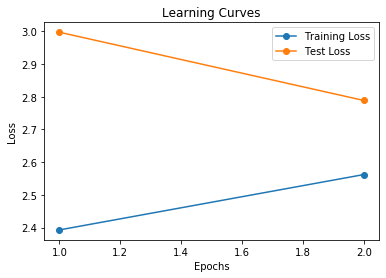

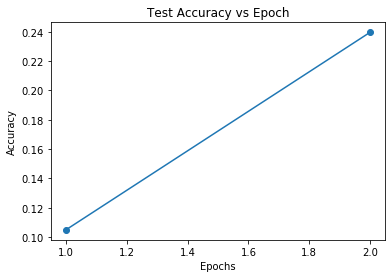

In [7]:
figSaveFile = os.path.join(resPath,'dnn_learning_curve.png')
fig = model.plot(figType = 'lrCurve', saveFile = figSaveFile)
figSaveFile = os.path.join(resPath,'dnn_accuracy.png')
fig = model.plot(saveFile = figSaveFile)

torch.Size([5])